#### Quantization is a technique to downsize a trained model so that you can deploy it on EDGE devices.

> (1) Train a hand written digits model
>
> (2) Export to a disk and check the size of that model
>
> (3) Use two techniques for quantization (1) post training quantization (3) quantization aware training

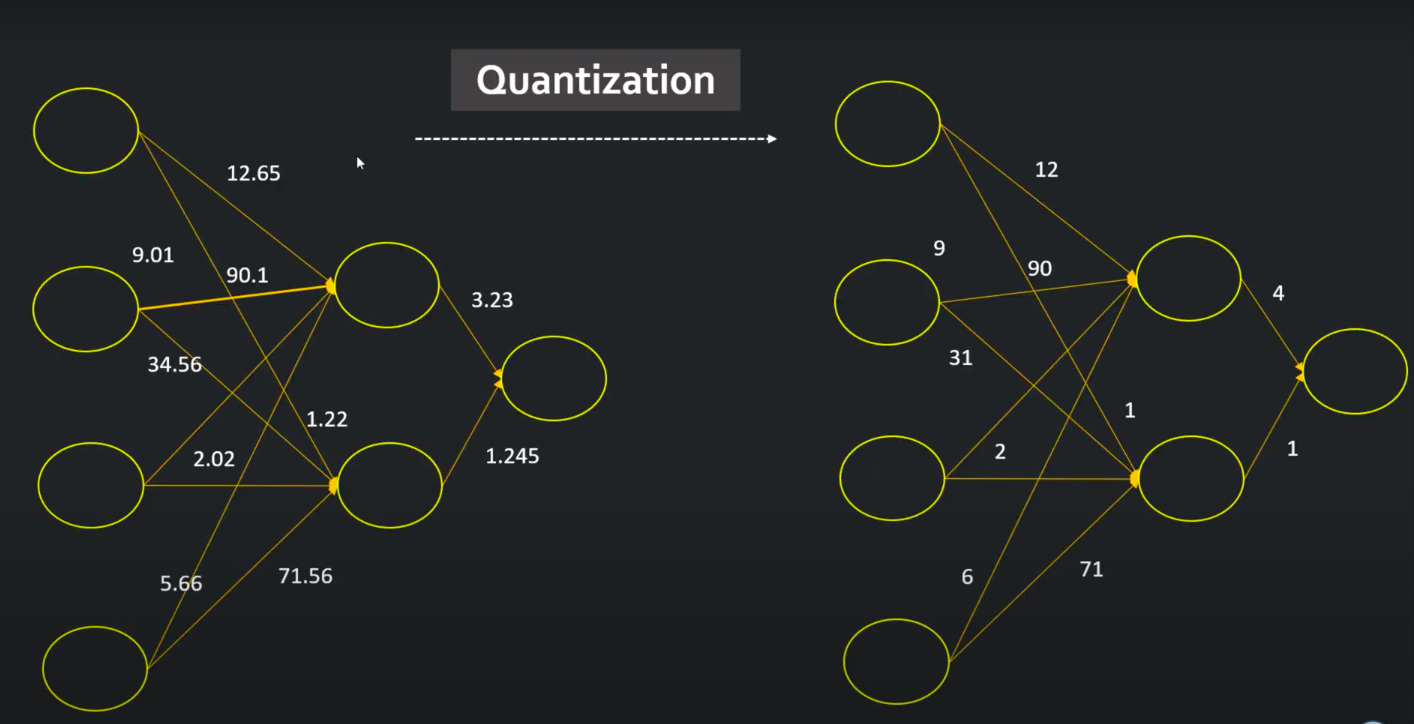

In [9]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [11]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [13]:
len(X_train)

60000

In [15]:
len(X_test)

10000

In [17]:
X_train[0].shape

(28, 28)

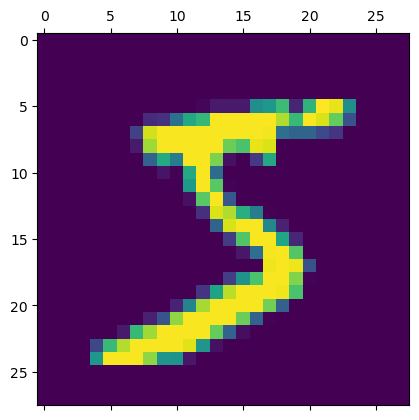

In [19]:
plt.matshow(X_train[0])

In [21]:
y_train[0]

5

In [29]:


X_train = X_train / 255
X_test = X_test / 255



In [30]:


X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)



In [33]:

X_train_flattened.shape


(60000, 784)

## Using Flatten layer so that we don't have to call .reshape on input dataset

In [36]:

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=5)


/Users/hirdeshpal/anaconda3/lib/python3.11/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.5491 - loss: 1.7072
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8623 - loss: 0.5581
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8899 - loss: 0.4107
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9005 - loss: 0.3568
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9065 - loss: 0.3335


In [40]:

model.evaluate(X_test,y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8994 - loss: 0.3480


[0.3067219853401184, 0.9138000011444092]

In [59]:
model.export('/Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model')

INFO:tensorflow:Assets written to: /Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model/assets


INFO:tensorflow:Assets written to: /Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model/assets


Saved artifact at '/Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 28, 28), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 10), dtype=tf.float32, name=None)
Captures:
  5293830768: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5293832000: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5293831296: TensorSpec(shape=(), dtype=tf.resource, name=None)
  5293830944: TensorSpec(shape=(), dtype=tf.resource, name=None)


## (1) Post training quantization

In [61]:
# Without quantization

converter = tf.lite.TFLiteConverter.from_saved_model("/Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model")
tflite_model = converter.convert()


W0000 00:00:1746184022.708720 2523875 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1746184022.709789 2523875 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-02 13:07:02.715690: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model
2025-05-02 13:07:02.717094: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-02 13:07:02.717145: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model
2025-05-02 13:07:02.740102: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:388] MLIR V1 optimization pass is not enabled
2025-05-02 13:07:02.740947: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-02 13:07:02.815386: I tensorflow/cc/saved_model/loader.cc:218] Running in

In [63]:
# With quantization

converter = tf.lite.TFLiteConverter.from_saved_model("/Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quant_model = converter.convert()

W0000 00:00:1746184107.354750 2523875 tf_tfl_flatbuffer_helpers.cc:390] Ignored output_format.
W0000 00:00:1746184107.354782 2523875 tf_tfl_flatbuffer_helpers.cc:393] Ignored drop_control_dependency.
2025-05-02 13:08:27.355303: I tensorflow/cc/saved_model/reader.cc:83] Reading SavedModel from: /Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model
2025-05-02 13:08:27.356408: I tensorflow/cc/saved_model/reader.cc:51] Reading meta graph with tags { serve }
2025-05-02 13:08:27.356441: I tensorflow/cc/saved_model/reader.cc:146] Reading SavedModel debug info (if present) from: /Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model
2025-05-02 13:08:27.380513: I tensorflow/cc/saved_model/loader.cc:234] Restoring SavedModel bundle.
2025-05-02 13:08:27.452161: I tensorflow/cc/saved_model/loader.cc:218] Running initialization op on SavedModel bundle at path: /Users/hirdeshpal/Jupiter Notebook/ML Algorithms/Deep Leaning/quantization_model
2025-0

In [65]:

len(tflite_model)


319948

In [67]:

len(tflite_quant_model)


84824


#### You can see above that quantizated model is 1/4th the size of a non quantized model.


In [69]:
with open("tflite_model.tflite", "wb") as f:
    f.write(tflite_model)


In [73]:
with open("tflite_quant_model.tflite", "wb") as f:
    f.write(tflite_quant_model)
    

 #### Once you have above files saved to a disk, check their sizes. Quantized model will be obvi

## (2) Quantization aware training

In [81]:

!pip install -U tensorflow-model-optimization



  Attempting uninstall: absl-py
    Found existing installation: absl-py 2.1.0
    Uninstalling absl-py-2.1.0:
      Successfully uninstalled absl-py-2.1.0


In [83]:
import tensorflow_model_optimization as tfmot

quantize_model = tfmot.quantization.keras.quantize_model

# q_aware stands for for quantization aware.
q_aware_model = quantize_model(model)

# `quantize_model` requires a recompile.
q_aware_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

q_aware_model.summary()


ValueError: `to_quantize` can only either be a keras Sequential or Functional model.